# Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using **tables**, **histograms**, **boxplots**, **scatter plots** and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

In this notebook will use the [Seaborn](https://seaborn.pydata.org/) data processing library, which is a higher-level interface to **Matplotlib** that can be used to simplify many visualization tasks

The **Seaborn** provides visualisations tools that will allow to explore data from a graphical perspective.


## Acknowledgments

- Data from https://www.coursera.org/ from the course "Understanding and Visualizing Data with Python" by University of Michigan

# Importing libraries

In [16]:
# Import the packages that we will be using
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Importing data

In [1]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
#if RunInColab:
    # Mount your google drive in google colab
   # from google.colab import drive
   # drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    #Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"


    # Define path del proyecto
Ruta            = ""

In [13]:
# url string that hosts our .csv file
ruta_csv = "~/escuela/semana_tec_analitica/TC1002S/NotebooksStudents/A01642759/iris/iris.data"
# Read the .csv file and store it as a pandas Data Frame
col_names = ["sepal length", "sepal width", "petal length", "petal width", "class"]
df = pd.read_csv(ruta_csv,names=col_names)



# Exploring the content of the data set

Get a general 'feel' of the data


In [5]:
df.describe()


,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Frequency tables

The `value_counts()` method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. The `value_counts()` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts()` is actually a **Pandas** data frame, so can be further processed using any Pandas methods for working with data frames.


In [6]:
# Number of times that each distinct value of a variable occurs in a data set
df.value_counts()


sepal length  sepal width  petal length  petal width  class         
4.9           3.1          1.5           0.1          Iris-setosa       3
5.8           2.7          5.1           1.9          Iris-virginica    2
4.3           3.0          1.1           0.1          Iris-setosa       1
4.4           3.2          1.3           0.2          Iris-setosa       1
4.5           2.3          1.3           0.3          Iris-setosa       1
                                                                       ..
7.7           2.6          6.9           2.3          Iris-virginica    1
              2.8          6.7           2.0          Iris-virginica    1
              3.0          6.1           2.3          Iris-virginica    1
              3.8          6.7           2.2          Iris-virginica    1
7.9           3.8          6.4           2.0          Iris-virginica    1
Name: count, Length: 147, dtype: int64

In [7]:
# Proportion of each distinct value of a variable occurs in a data set
proportion = df.value_counts(normalize=True)
proportion

sepal length  sepal width  petal length  petal width  class         
4.9           3.1          1.5           0.1          Iris-setosa       0.020000
5.8           2.7          5.1           1.9          Iris-virginica    0.013333
4.3           3.0          1.1           0.1          Iris-setosa       0.006667
4.4           3.2          1.3           0.2          Iris-setosa       0.006667
4.5           2.3          1.3           0.3          Iris-setosa       0.006667
                                                                          ...   
7.7           2.6          6.9           2.3          Iris-virginica    0.006667
              2.8          6.7           2.0          Iris-virginica    0.006667
              3.0          6.1           2.3          Iris-virginica    0.006667
              3.8          6.7           2.2          Iris-virginica    0.006667
7.9           3.8          6.4           2.0          Iris-virginica    0.006667
Name: proportion, Length: 147, dtype: fl

Note that the `value_counts()` method excludes missing values. We confirm this below by adding up observations to your data frame with some missing values and then computing `value_counts()` and comparing this to the total number of rows in the data set, which is 28. This tells us that there are 28 - (21+6) = 1 missing values for this variable (other variables may have different numbers of missing values).

In [21]:
# Total number of observations
n_obs = df.shape[0]
print(n_obs)
#agrego una fila vacia 
df.loc[len(df)] = [np.nan] * df.shape[1]
df.tail()
# otal number of null observations in Age
pd.isnull(df).sum()



152


sepal length    3
sepal width     3
petal length    3
petal width     3
class           3
dtype: int64

In [22]:
# Total number of counts in Age (excluding missing values)
df.value_counts(normalize=True)

sepal length  sepal width  petal length  petal width  class         
4.9           3.1          1.5           0.1          Iris-setosa       0.020000
5.8           2.7          5.1           1.9          Iris-virginica    0.013333
4.3           3.0          1.1           0.1          Iris-setosa       0.006667
4.4           3.2          1.3           0.2          Iris-setosa       0.006667
4.5           2.3          1.3           0.3          Iris-setosa       0.006667
                                                                          ...   
7.7           2.6          6.9           2.3          Iris-virginica    0.006667
              2.8          6.7           2.0          Iris-virginica    0.006667
              3.0          6.1           2.3          Iris-virginica    0.006667
              3.8          6.7           2.2          Iris-virginica    0.006667
7.9           3.8          6.4           2.0          Iris-virginica    0.006667
Name: proportion, Length: 147, dtype: fl

# Histogram

It is often good to get a feel for the shape of the distribution of the data.

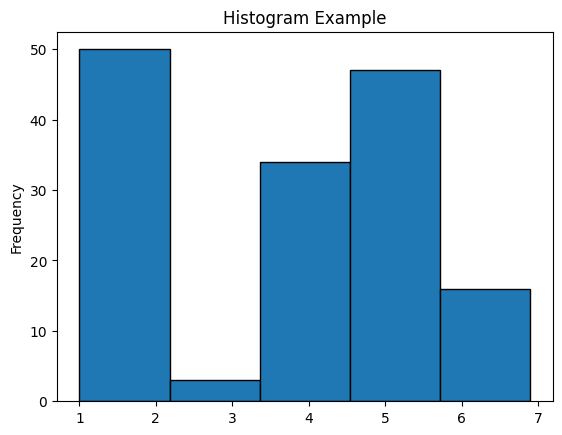

In [24]:
# Plot histogram of petal length
df["petal length"].plot(kind='hist', bins=5, edgecolor='black', title='Histogram Example')
plt.show()


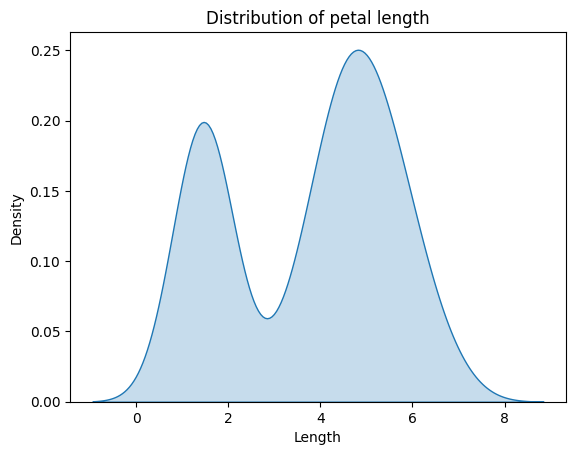

In [26]:
# Plot distribution of petal length
sns.kdeplot(df["petal length"], fill=True)


plt.title('Distribution of petal length')
plt.xlabel('Length')
plt.show()


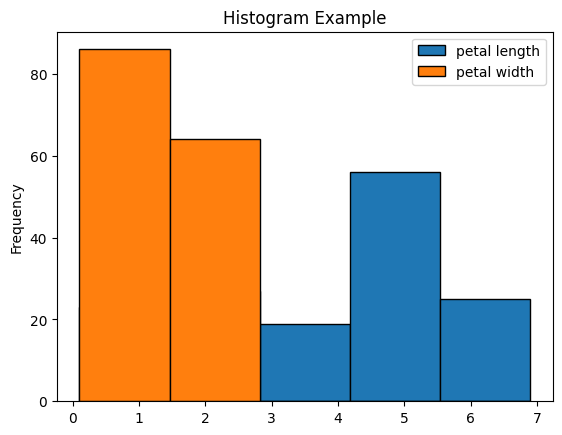

In [27]:
# Plot histogram of both the petal length and width

# Plot histogram of petal length and width
df[["petal length", "petal width"]].plot(kind='hist', bins=5, edgecolor='black', title='Histogram Example')
plt.show()

# Histograms plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a histograms of one quantitative variable grouped by another categorical variables.

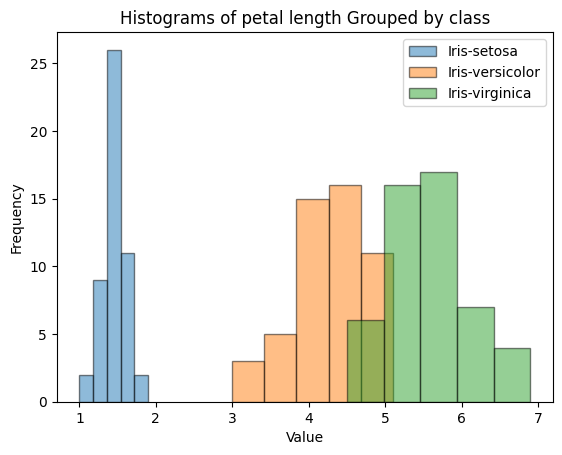

In [31]:
# Create histograms of the "Wingspan" grouped by "Gender"
df.groupby("class")["petal length"].plot(kind='hist', bins=5, alpha=0.5, legend=True, edgecolor='black')

# Add titles and labels
plt.title('Histograms of petal length Grouped by class')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()



# Boxplots

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

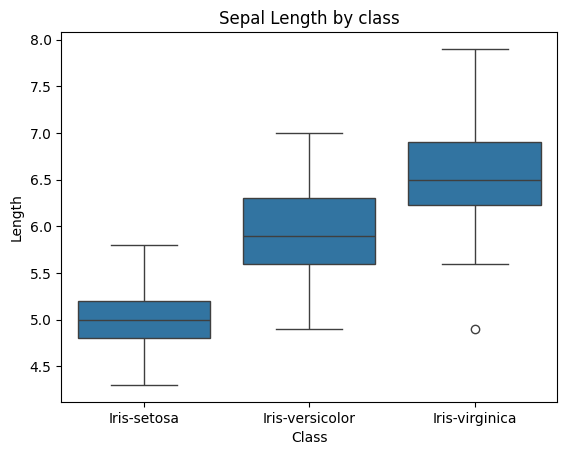

In [37]:
# Create the boxplot of the "sepal length"
sns.boxplot(x="class", y='sepal length', data=df)


plt.title('Sepal Length by class')
plt.xlabel('Class')
plt.ylabel('Length')


plt.show()

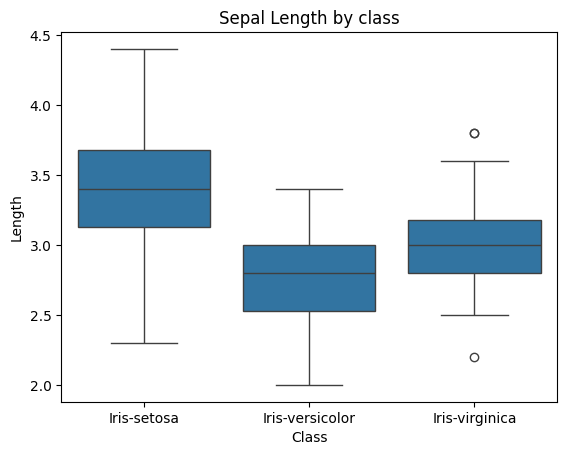

In [38]:
# Create the boxplot of the "Sepal width"
sns.boxplot(x="class", y='sepal width', data=df)


plt.title('Sepal Length by class')
plt.xlabel('Class')
plt.ylabel('Length')


plt.show()


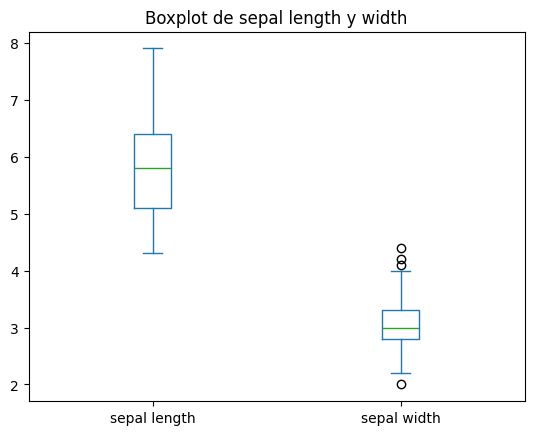

In [44]:
# Create the boxplots of the "sepal length" and "sepal width"

df[["sepal length", "sepal width"]].plot.box()

plt.title('Boxplot de sepal length y width')
plt.show()


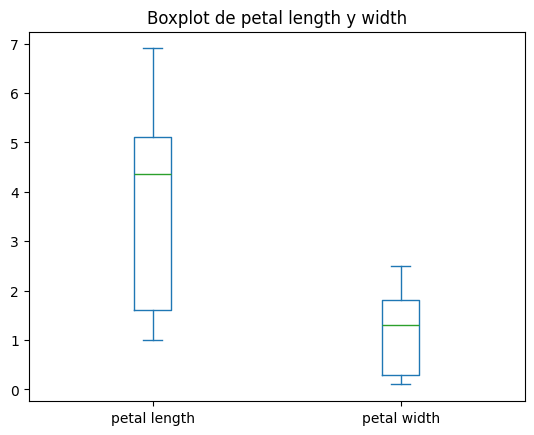

In [45]:
# Create the boxplots of the "petal length" and "petal width"
df[["petal length", "petal width"]].plot.box()

plt.title('Boxplot de petal length y width')
plt.show()

# Boxplots plotted by groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Thus, we can create a side-by-side boxplots of one quantitative variable grouped by another categorical variables.

<Axes: ylabel='petal length'>

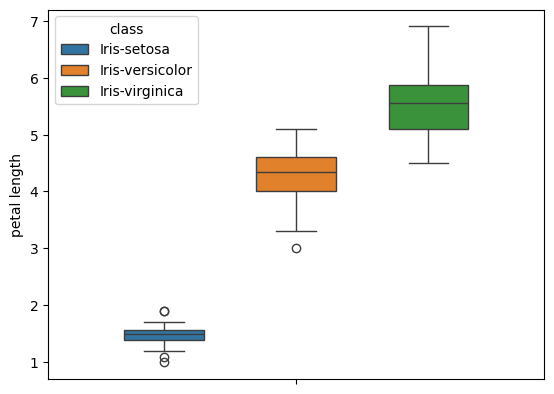

In [46]:
# Create side-by-side boxplots of the "CWDistance" grouped by "Gender"
sns.boxplot(data=df, y='petal length', hue='class', gap=.4)



<Axes: xlabel='petal width', ylabel='petal length'>

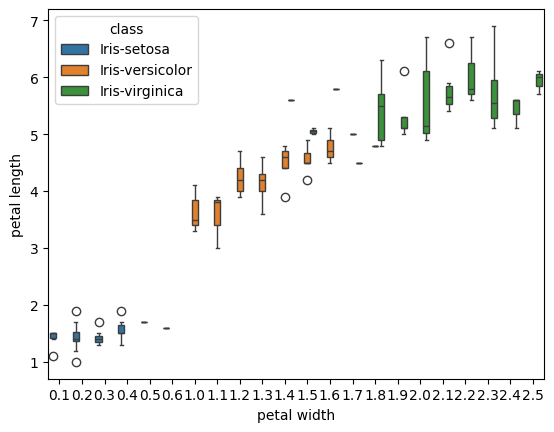

In [48]:
# Create side-by-side boxplots of the "Glasses" grouped by "Gender"
sns.boxplot(data=df, x="petal width", y="petal length", hue="class")



# Histograms and boxplots plotted by groups

We cal also create both boxplots and histograms of one quantitative variable grouped by another categorical variables


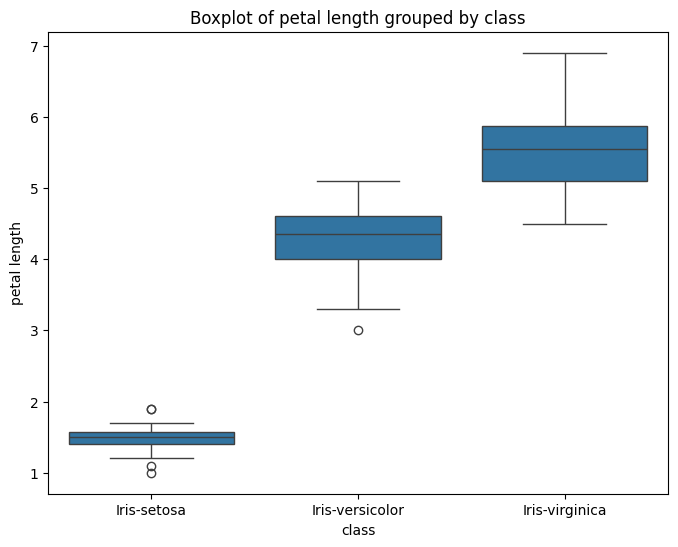

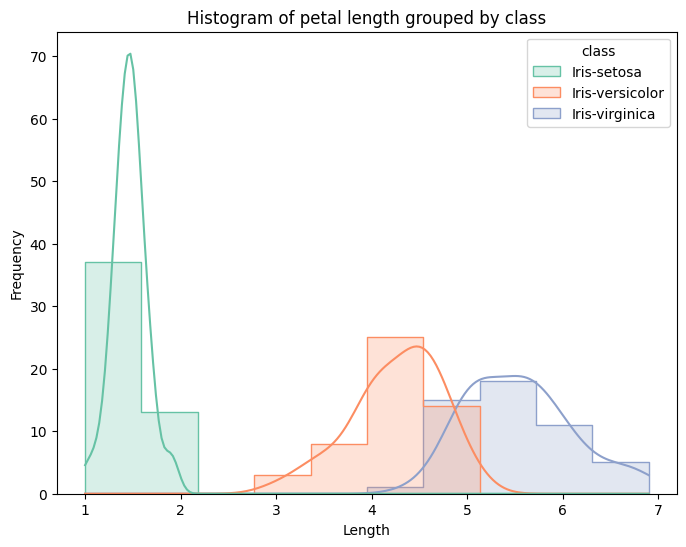

In [51]:
# Create a boxplot and histogram of the "petal length" grouped by "class"
plt.figure(figsize=(8, 6))
sns.boxplot(x="class", y="petal length", data=df)
plt.title('Boxplot of petal length grouped by class')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="petal length", hue="class", bins=10, kde=True, element='step', palette="Set2")
plt.title('Histogram of petal length grouped by class')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


# Scatter plot

Plot values of one variable versus another variable to see how they are correlated

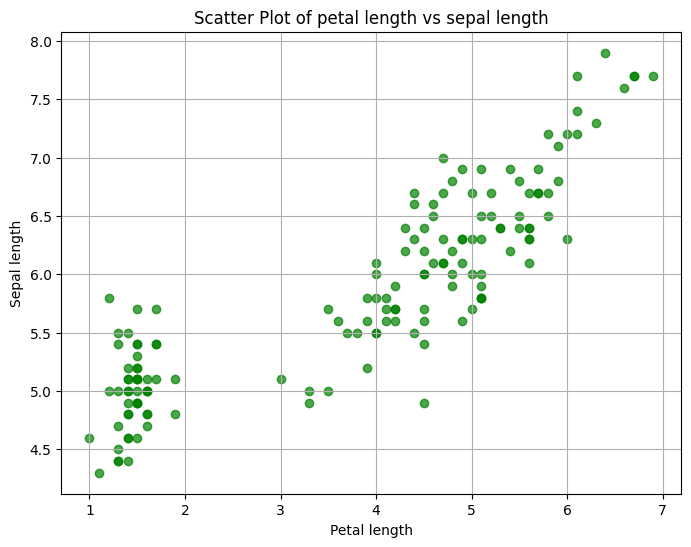

In [55]:
# scatter plot between two variables

plt.figure(figsize=(8, 6))
plt.scatter(df['petal length'], df['sepal length'], color='green', alpha=0.7)


plt.title('Scatter Plot of petal length vs sepal length')
plt.xlabel('Petal length')
plt.ylabel('Sepal length')


plt.grid(True)
plt.show()

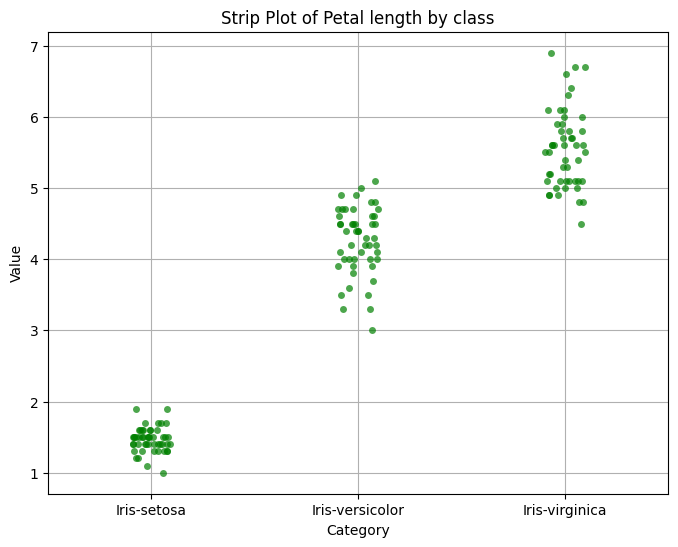

In [59]:
# scatter plot between two variables (one categorical)
plt.figure(figsize=(8, 6))
sns.stripplot(x='class', y='petal length', data=df, jitter=True, color='green', alpha=0.7)

plt.title('Strip Plot of Petal length by class')
plt.xlabel('Category')
plt.ylabel('Value')
plt.grid(True)
plt.show()

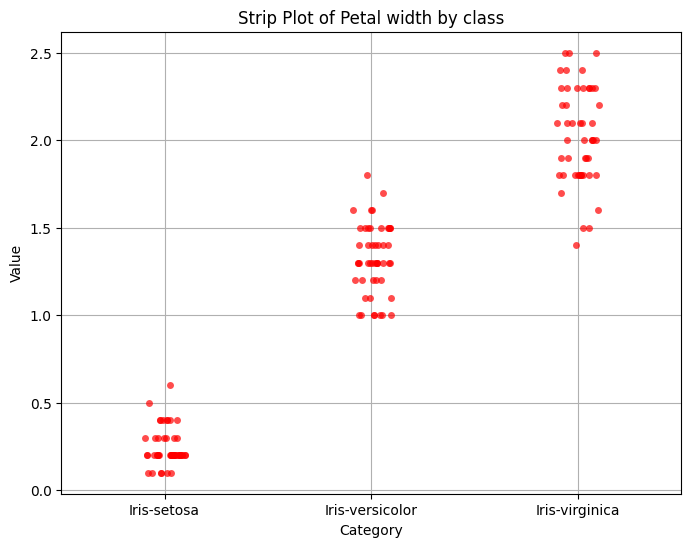

In [60]:
# scatter plot between two variables (one categorical)
plt.figure(figsize=(8, 6))
sns.stripplot(x='class', y='petal width', data=df, jitter=True, color='red', alpha=0.7)

plt.title('Strip Plot of Petal width by class')
plt.xlabel('Category')
plt.ylabel('Value')
plt.grid(True)
plt.show()

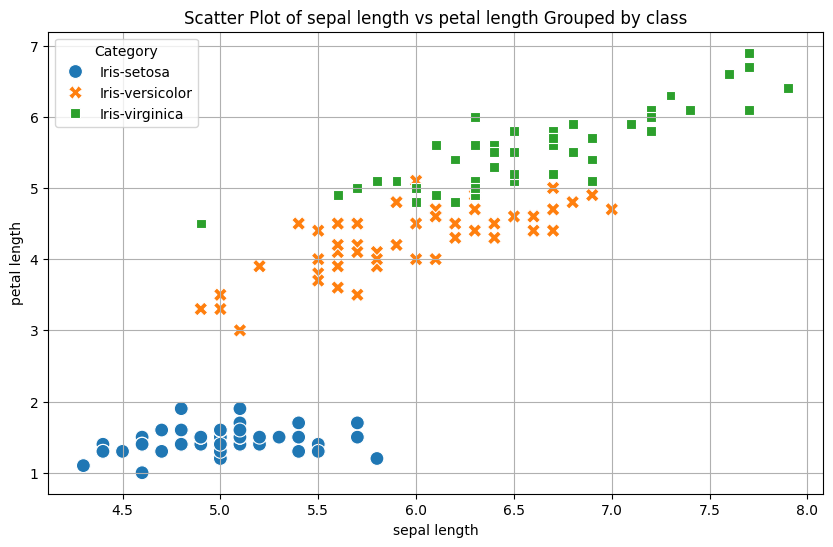

In [63]:
# scatter plot between two variables grouped according to a categorical variable
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length', y='petal length', hue='class', data=df, style='class', s=100)

plt.title('Scatter Plot of sepal length vs petal length Grouped by class')

plt.grid(True)
plt.legend(title='Category')
plt.show()

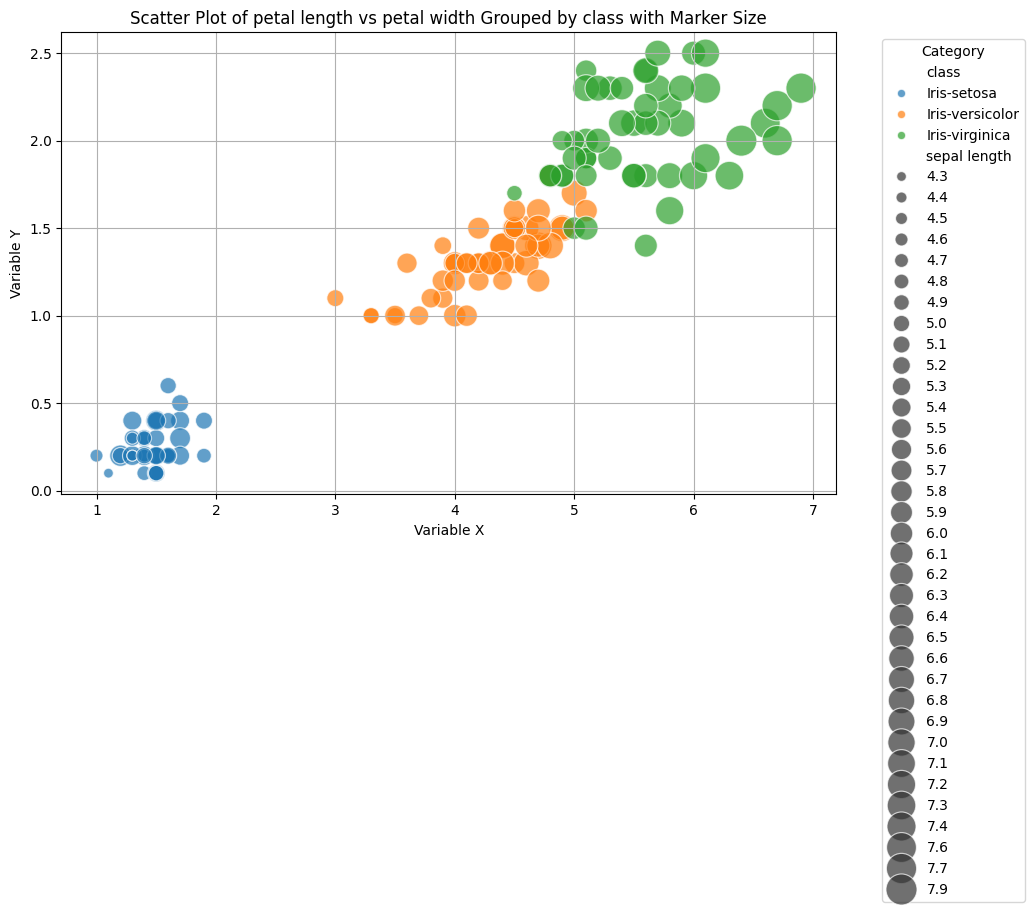

In [65]:
# scatter plot between two variables grouped according to a categorical variable and with size of markers

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='petal length', 
    y='petal width', 
    hue='class', 
    size='sepal length', 
    sizes=(50, 500),  # Minimum and maximum size of markers
    data=df,
    legend="full",
    alpha=0.7
)

plt.title('Scatter Plot of petal length vs petal width Grouped by class with Marker Size')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')

plt.grid(True)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Final remarks


- Visualizing your data using **tables**, **histograms**, **boxplots**, **scatter plots** and other tools is essential to carry put analysis and extract conclusions

- There are several ways to do the same thing

- The **Seaborn** package provides visualisations tools that allow to explore data from a graphical perspective


# Activity: work with the iris dataset

Repeat this tutorial with the iris data set and respond to the following inquiries

1. Plot the histograms for each of the four quantitative variables


2. Plot the histograms for each of the quantitative variables


3. Plot the boxplots for each of the quantitative variables


4. Plot the boxplots of the petal width grouped by type of flower


5. Plot the boxplots of the setal length grouped by type of flower


6. Provide a description (explaination from your observations) of each of the quantitative variables



# Histograms 

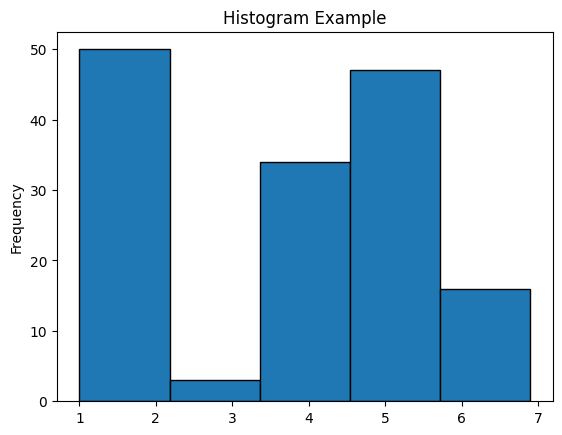

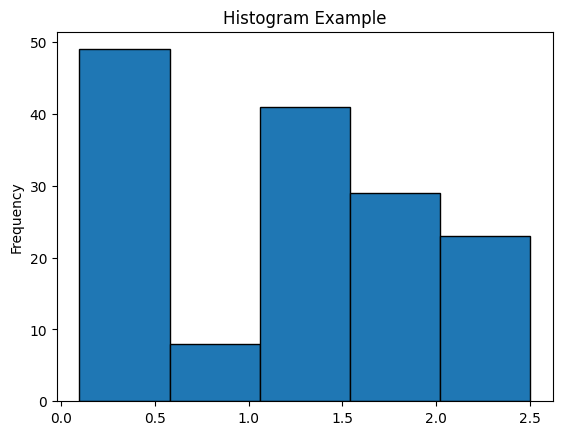

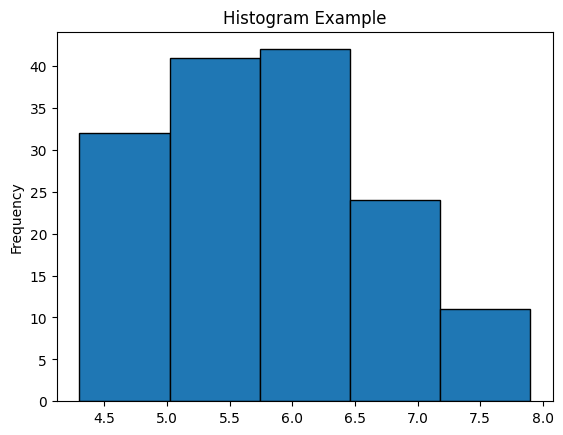

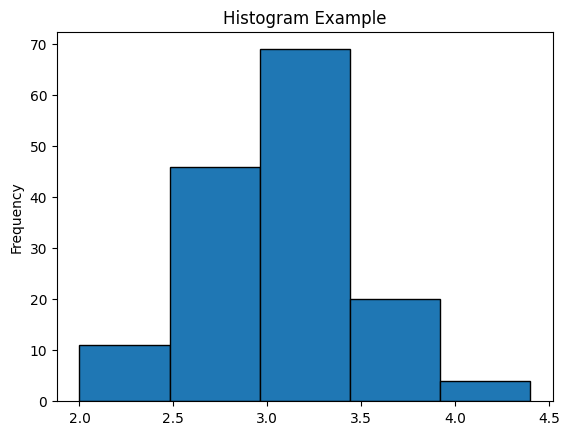

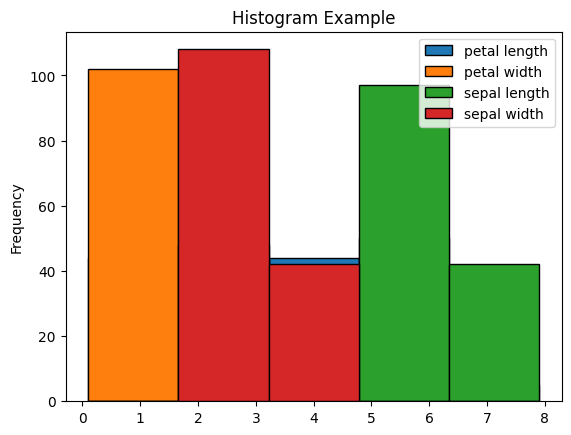

In [67]:
# Plot histogram of petal length
df["petal length"].plot(kind='hist', bins=5, edgecolor='black', title='Histogram Example')
plt.show()

# Plot histogram of petal length
df["petal width"].plot(kind='hist', bins=5, edgecolor='black', title='Histogram Example')
plt.show()

# Plot histogram of petal length
df["sepal length"].plot(kind='hist', bins=5, edgecolor='black', title='Histogram Example')
plt.show()

# Plot histogram of petal length
df["sepal width"].plot(kind='hist', bins=5, edgecolor='black', title='Histogram Example')
plt.show()

# histogram with the four quantitative variables
df[["petal length", "petal width", "sepal length", "sepal width"]].plot(kind='hist', bins=5, edgecolor='black', title='Histogram Example')
plt.show()

# Scatterplot

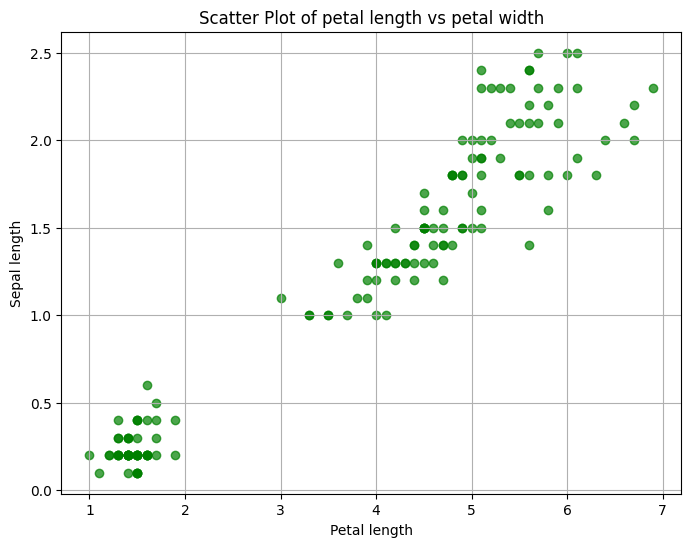

In [74]:
# scatter plot between two variables

plt.figure(figsize=(8, 6))
plt.scatter(df['petal length'], df['petal width'], color='green', alpha=0.7)


plt.title('Scatter Plot of petal length vs petal width')
plt.xlabel('Petal length')
plt.ylabel('Sepal length')


plt.grid(True)
plt.show()

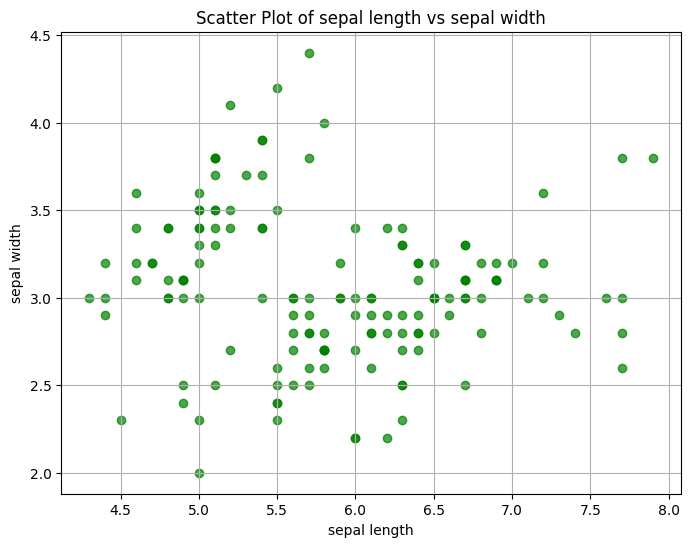

In [75]:
# scatter plot between two variables

plt.figure(figsize=(8, 6))
plt.scatter(df['sepal length'], df['sepal width'], color='green', alpha=0.7)


plt.title('Scatter Plot of sepal length vs sepal width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')


plt.grid(True)
plt.show()

# Boxplots


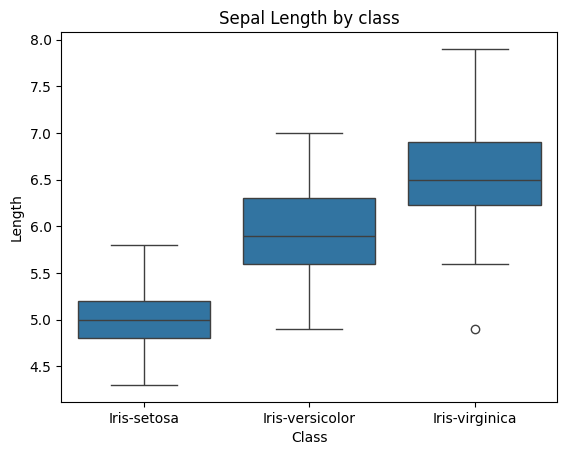

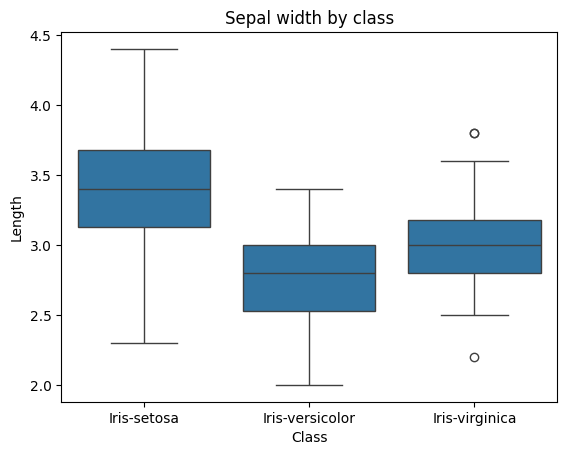

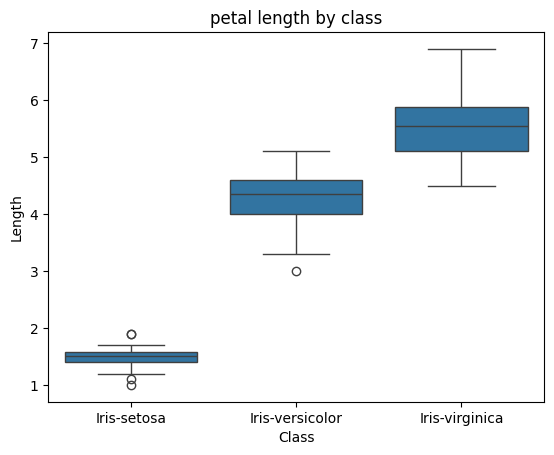

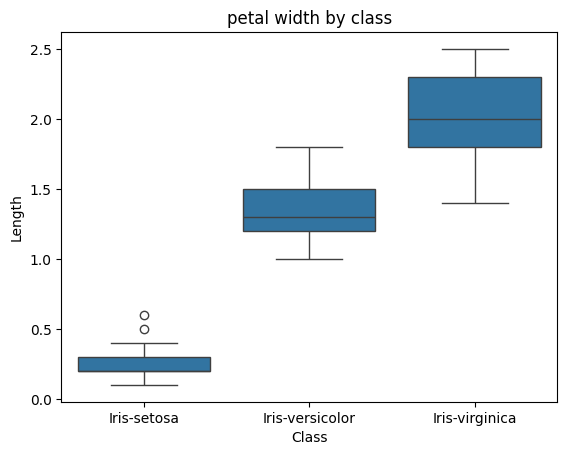

In [77]:
# Create the boxplot of the "sepal length"
sns.boxplot(x="class", y='sepal length', data=df)


plt.title('Sepal Length by class')
plt.xlabel('Class')
plt.ylabel('Length')
plt.show()


sns.boxplot(x="class", y='sepal width', data=df)
plt.title('Sepal width by class')
plt.xlabel('Class')
plt.ylabel('Length')
plt.show()

sns.boxplot(x="class", y='petal length', data=df)
plt.title('petal length by class')
plt.xlabel('Class')
plt.ylabel('Length')
plt.show()

sns.boxplot(x="class", y='petal width', data=df)
plt.title('petal width by class')
plt.xlabel('Class')
plt.ylabel('Length')
plt.show()

From the boxplots, it's easy to see that the largest flower from the three is the Iris-Virginica. In average, it has a larger petal and sepal. The petal width is also bigger in the Iris-virginica.